<a href="https://colab.research.google.com/github/Joseline7/AluraStoreLatam/blob/master/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [4]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [5]:
#Necesitamos la suma de los valores de Precios de cada tienda.

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

nombre_tiendas = []
ingreso_total = []

for nombre, datos in tiendas.items():
    ingreso = datos['Precio'].sum()
    nombre_tiendas.append(nombre)
    ingreso_total.append(ingreso)
    print(f"{nombre}: ${ingreso:.0f}")

Tienda 1: $1150880400
Tienda 2: $1116343500
Tienda 3: $1098019600
Tienda 4: $1038375700


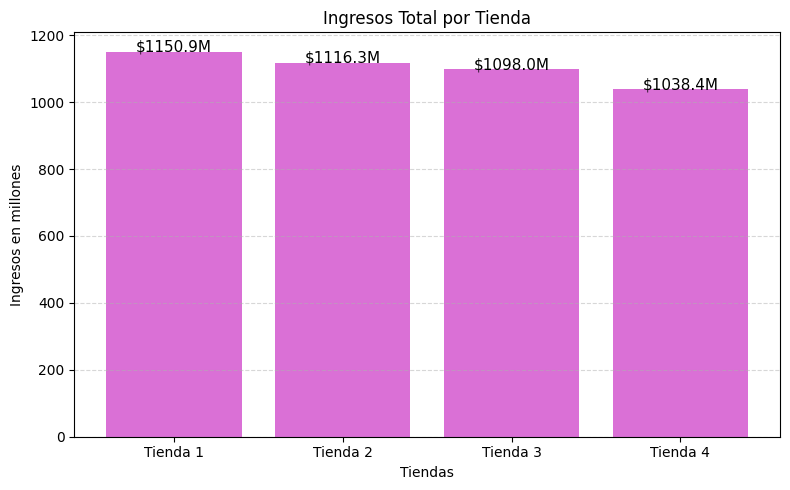

In [7]:
# Convertir ingresos a millones para mostrar en eje y

ingresos_millones = [i / 1_000_000 for i in ingreso_total]

plt.figure(figsize=(8, 5))
barras = plt.bar(nombre_tiendas, ingresos_millones, color = 'orchid')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos en millones')
plt.title('Ingresos Total por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.5)


# Mostrar etiquetas arriba de cada barra
for i, valor in enumerate(ingresos_millones):
    plt.text(i, valor + 0.5, f"${valor:.1f}M", ha='center', fontsize=11)

plt.tight_layout()
plt.show()



# 2. Ventas por categoría

In [8]:
# Aquí se requiere determinar cuántos productos se han vendido por categoría en cada tienda.
# El objetivo es organizar la información por tipo de producto y contabilizar las ventas,
# resaltando las categorías con mayor demanda en cada establecimiento.

enumeracion_de_producto = []

for nombre, datos in tiendas.items():
    enumeracion_de_productos = datos["Categoría del Producto"].value_counts().reset_index(name="cantidad")
    nombre_tiendas.append(nombre)
    enumeracion_de_producto.append(enumeracion_de_productos)
    print(f"\n{nombre}:_________________\n{enumeracion_de_productos}")


Tienda 1:_________________
    Categoría del Producto  cantidad
0                  Muebles       465
1             Electrónicos       448
2                 Juguetes       324
3        Electrodomésticos       312
4     Deportes y diversión       284
5   Instrumentos musicales       182
6                   Libros       173
7  Artículos para el hogar       171

Tienda 2:_________________
    Categoría del Producto  cantidad
0                  Muebles       442
1             Electrónicos       422
2                 Juguetes       313
3        Electrodomésticos       305
4     Deportes y diversión       275
5   Instrumentos musicales       224
6                   Libros       197
7  Artículos para el hogar       181

Tienda 3:_________________
    Categoría del Producto  cantidad
0                  Muebles       499
1             Electrónicos       451
2                 Juguetes       315
3        Electrodomésticos       278
4     Deportes y diversión       277
5                   Libros  

In [9]:
enumeracion_de_producto[3]

,Categoría del Producto,cantidad
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


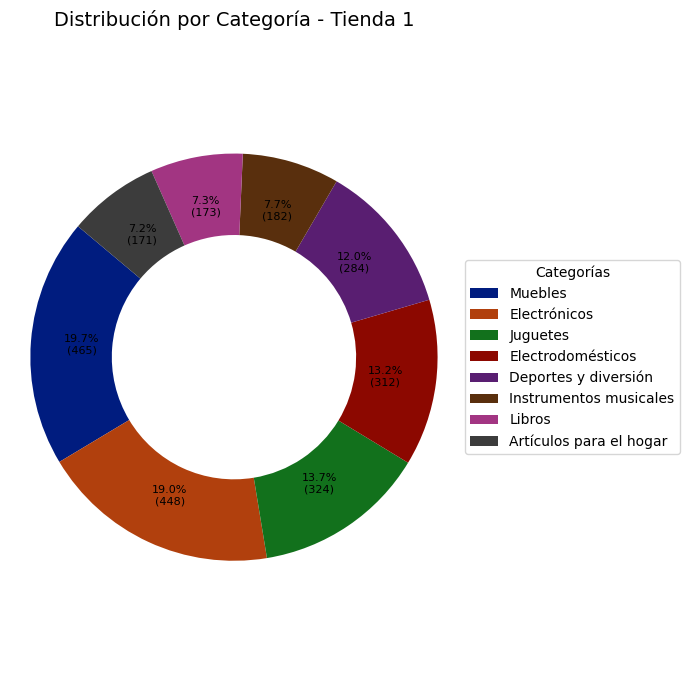

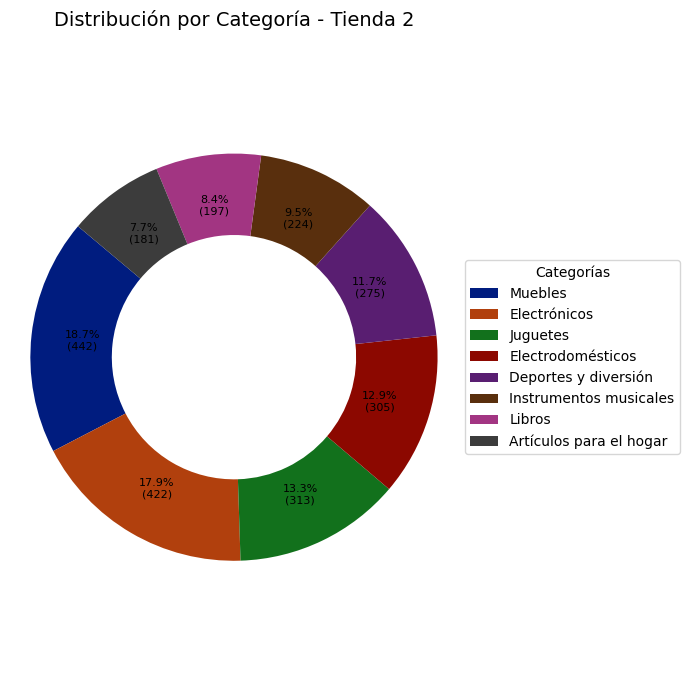

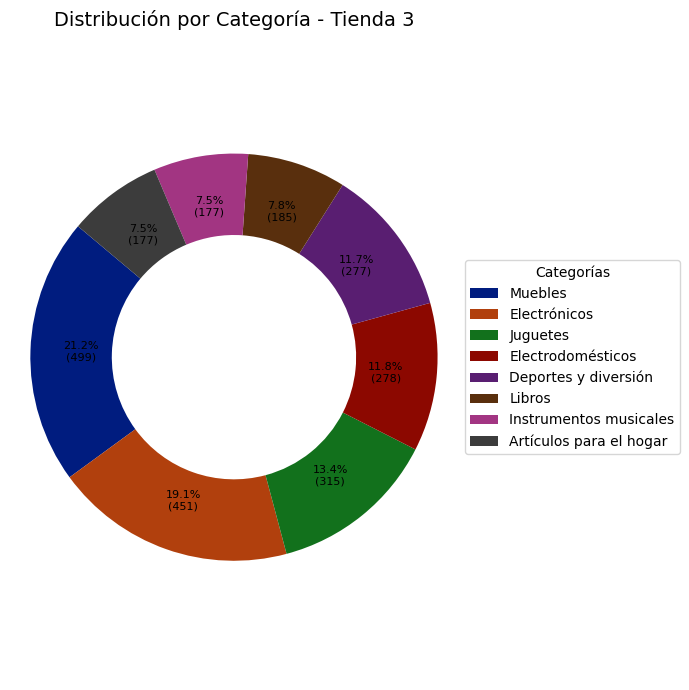

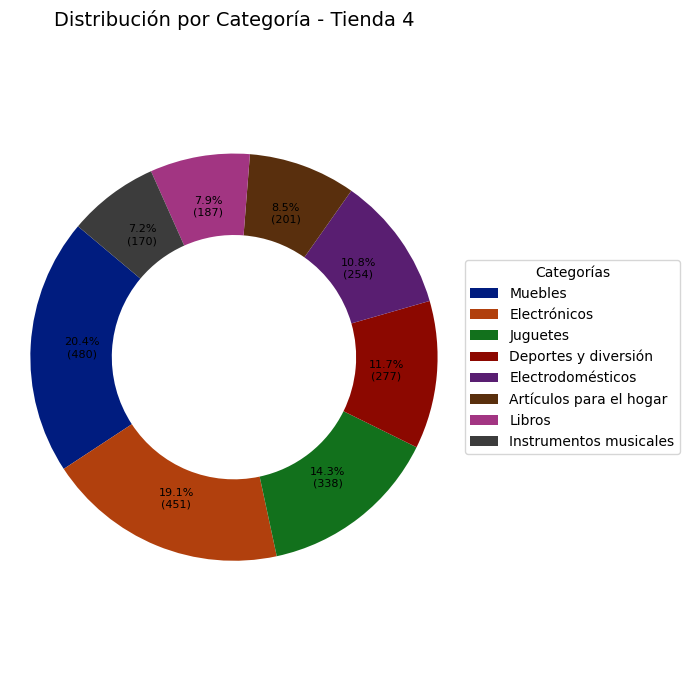

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para mostrar porcentaje y cantidad
def etiqueta_autopct(pct, total):
    count = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({count})'

# Gráficos donut por tienda con mejoras
for nombre, datos in tiendas.items():
    conteo = datos["Categoría del Producto"].value_counts()
    colores = sns.color_palette("dark", len(conteo))  # Colores personalizados

    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        conteo.values,
        labels=None,  # Se omiten etiquetas dentro del gráfico
        autopct=lambda pct: etiqueta_autopct(pct, sum(conteo.values)),
        pctdistance=0.75,
        startangle=140,
        colors=colores,
        wedgeprops={'width': 0.4}
    )

    plt.setp(autotexts, size=8, weight="regular", color="black")
    plt.title(f'Distribución por Categoría - {nombre}', fontsize=14)
    plt.axis('equal')

    # Leyenda externa
    plt.legend(wedges, conteo.index, title="Categorías", loc="center left", bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


In [11]:
# En este paso, debes calcular las calificaciones promedio de los clientes
# para cada tienda. El objetivo es conocer la satisfacción del cliente con
# los productos vendidos.

# Asegúrate de tener esta variable correctamente definida
NOMBRE_TIENDA = []
CAL_PROMEDIO = []

print("CALIFICACIONES:")
for nombre, datos in tiendas.items():
    PROMEDIO = datos["Calificación"].mean()  # Asegúrate de que "Calificación" exista
    NOMBRE_TIENDA.append(nombre)
    CAL_PROMEDIO.append(PROMEDIO)
    print(f"{nombre}: {PROMEDIO:.3f}/5.0")

CALIFICACIONES:
Tienda 1: 3.977/5.0
Tienda 2: 4.037/5.0
Tienda 3: 4.048/5.0
Tienda 4: 3.996/5.0


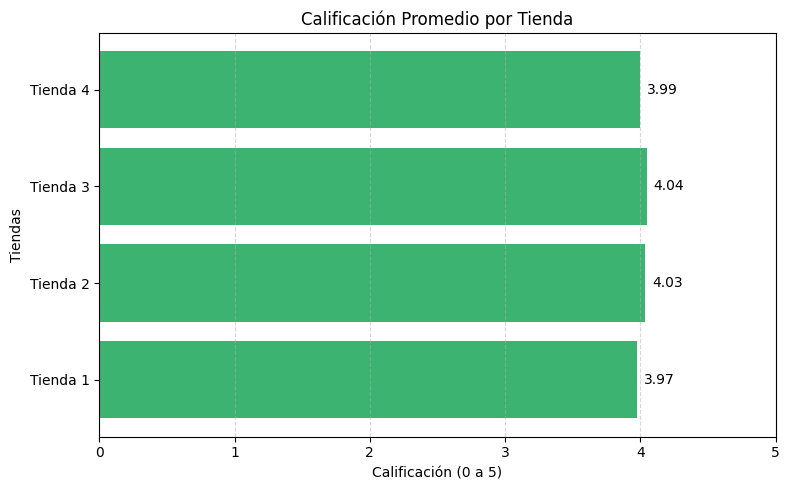

In [16]:
# Gráfico de barras horizontales
plt.figure(figsize=(8, 5))
barras = plt.barh(NOMBRE_TIENDA, CAL_PROMEDIO, color='mediumseagreen')

plt.title('Calificación Promedio por Tienda')
plt.xlabel('Calificación (0 a 5)')
plt.xlim(0, 5)
plt.ylabel('Tiendas')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Etiquetas a la derecha de cada barra
for i, valor in enumerate(CAL_PROMEDIO):
    truncado = int(valor * 100) / 100  # Truncar sin redondear
    plt.text(valor + 0.05, i, f"{truncado:.2f}", va='center')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [13]:
import matplotlib.pyplot as plt
import numpy as np

tiendas_mas = []
ventas_mas = []
productos_mas = []

tiendas_menos = []
ventas_menos = []
productos_menos = []

for nombre, datos in tiendas.items():
    conteo = datos["Producto"].value_counts()

    mas_vendido = conteo.index[0]
    cantidad_mas = conteo.iloc[0]

    menos_vendido = conteo.index[-1]
    cantidad_menos = conteo.iloc[-1]

    tiendas_mas.append(nombre)
    ventas_mas.append(cantidad_mas)
    productos_mas.append(mas_vendido)

    tiendas_menos.append(nombre)
    ventas_menos.append(cantidad_menos)
    productos_menos.append(menos_vendido)

    print(f"""{nombre}:
Más vendido: {mas_vendido} ({cantidad_mas} ventas)
Menos vendido: {menos_vendido} ({cantidad_menos} ventas)
""")

Tienda 1:
Más vendido: Microondas (60 ventas)
Menos vendido: Celular ABXY (33 ventas)

Tienda 2:
Más vendido: Iniciando en programación (65 ventas)
Menos vendido: Juego de mesa (32 ventas)

Tienda 3:
Más vendido: Kit de bancas (57 ventas)
Menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
Más vendido: Cama box (62 ventas)
Menos vendido: Guitarra eléctrica (33 ventas)



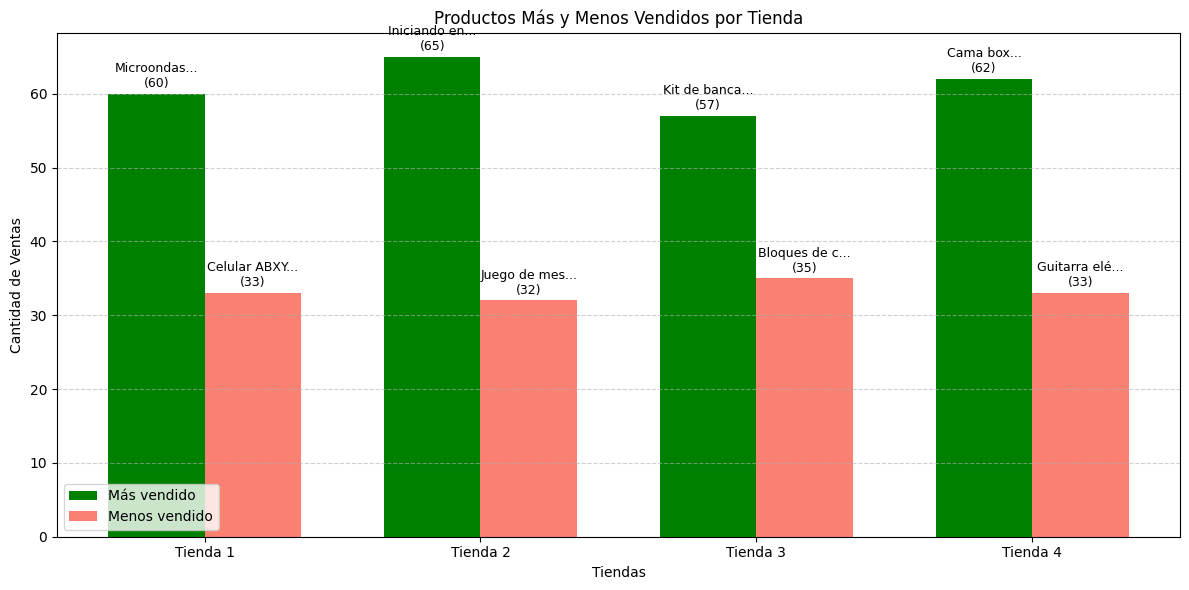

In [15]:
# Posiciones X
x = np.arange(len(tiendas_mas))
width = 0.35

# Gráfico
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, ventas_mas, width, label='Más vendido', color='green')
plt.bar(x + width/2, ventas_menos, width, label='Menos vendido', color='salmon')

# Etiquetas
plt.title("Productos Más y Menos Vendidos por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Cantidad de Ventas")
plt.xticks(x, tiendas_mas)
plt.legend(loc='lower left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Texto sobre cada barra
for i in range(len(x)):
    # Más vendido
    plt.text(x[i] - width/2, ventas_mas[i] + 0.5,
             f"{productos_mas[i][:12]}...\n({ventas_mas[i]})",
             ha='center', va='bottom', fontsize=9)

    # Menos vendido
    plt.text(x[i] + width/2, ventas_menos[i] + 0.5,
             f"{productos_menos[i][:12]}...\n({ventas_menos[i]})",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [9]:

# para comprobar
PRUEBA_T1 = tienda["Producto"].value_counts().reset_index(name="cantidad")
print(PRUEBA_T1)

                       Producto  cantidad
0                    Microondas        60
1                 TV LED UHD 4K        60
2                       Armario        60
3              Secadora de ropa        58
4                 Mesa de noche        56
5       Bloques de construcción        56
6           Balón de baloncesto        55
7                     Bicicleta        54
8                  Vaso térmico        54
9                  Refrigerador        54
10                    Impresora        54
11                      Batería        53
12                   Cubertería        52
13    Carrito de control remoto        52
14          Modelado predictivo        51
15                  Auriculares        50
16            Ajedrez de madera        49
17                    Iphone 15        49
18                 Lavavajillas        48
19             Lavadora de ropa        47
20           Guitarra eléctrica        47
21            Guitarra acústica        46
22              Sofá reclinable   

# 5. Envío promedio por tienda

In [10]:
# En este paso, debes calcular el costo de envío promedio para cada tienda.
# El objetivo es comprender cuánto se gasta, en promedio, en el envío de
# cada tienda.

costos_promedio = {}
for nombre, datos in tiendas.items():
    costo_envio_promedio = datos["Costo de envío"].mean()
    print(f"{nombre}: ${costo_envio_promedio:.2f}")
    costos_promedio[nombre] = costo_envio_promedio  # <-- Se guarda para graficar

Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


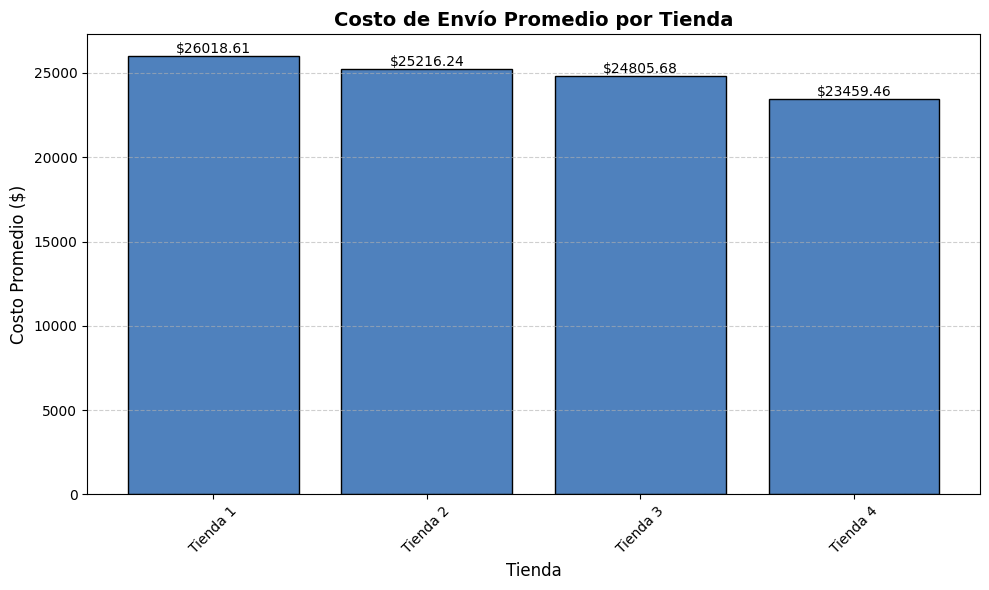

In [11]:
#Gráfico de barras
nombres = list(costos_promedio.keys())
valores = list(costos_promedio.values())

plt.figure(figsize=(10, 6))
barras = plt.bar(nombres, valores, color="#4F81BD", edgecolor='black', linewidth=1)

# Etiquetas encima de cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 0.3, f"${altura:.2f}",
             ha='center', va='bottom', fontsize=10, color='black')

plt.title("Costo de Envío Promedio por Tienda", fontsize=14, fontweight='bold')
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Costo Promedio ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()